<a href="https://colab.research.google.com/github/RafaelTorresCH/Signal-theory/blob/main/class%20notebooks%20/week_nov(3-7)/prequizz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔹 Modulación ASK — Amplitude Shift Keying

## 1. Definición general

En la modulación **ASK**, la **amplitud** de una portadora senoidal cambia según el símbolo digital transmitido.  
El resto de parámetros (frecuencia y fase) permanecen **constantes**.

La forma general de la señal transmitida es:

$$
s(t) = \sum_{i=-\infty}^{\infty} a_i \, v_i(t) \cos(\omega_0 t + \phi_0)
$$

donde:

- $a_i \in \{a_0, a_1\}$  son los **niveles de amplitud** asociados a cada bit.
- $v_i(t)$ es el **pulso de conformación** del símbolo (normalmente rectangular o gaussiano).
- $\omega_0 = 2\pi f_c$ es la **frecuencia angular** de la portadora.
- $\phi_0$ es la **fase inicial** (constante para todos los símbolos).
- El índice $i$ recorre los **intervalos temporales** de duración $T$ (un símbolo).

---

## 2. Caso binario

Para una modulación binaria, con bits $d_i \in \{0,1\}$, se define el mapeo:

$$
d_i = 0 \Rightarrow a_i = a_0, \quad d_i = 1 \Rightarrow a_i = a_1
$$

y típicamente:

$$
a_0 = 0, \quad a_1 = A
$$

por lo que la señal se reduce a:

$$
s(t) = \sum_i a_i \, v(t - iT) \cos(\omega_0 t)
$$

Esta forma particular se conoce como **On–Off Keying (OOK)**, ya que la portadora se “enciende” (ON) para el bit 1 y se “apaga” (OFF) para el bit 0.

---

## 3. Caso 2–ASK simétrico

Si se asignan niveles simétricos $a_0 = -A$, $a_1 = +A$,  
la señal toma la forma:

$$
s(t) = A \sum_i (2d_i - 1)\, v(t - iT) \cos(\omega_0 t)
$$

donde el término $(2d_i-1)$ representa la codificación **bipolar** de los bits $\{0,1\}$ en $\{-1,+1\}$.

---

## 4. Forma baseband equivalente

El modelo en banda base es:

$$
s_{bb}(t) = A \sum_i (2d_i - 1)\, v(t - iT)
$$

y su correspondiente representación pasabanda se obtiene multiplicando por la portadora:

$$
s(t) = \Re \{ s_{bb}(t) \, e^{j\omega_0 t} \}
$$

---

## 5. Potencia promedio

La potencia media transmitida es:

$$
P_{avg} = \frac{1}{2} E[a_i^2]
$$

ya que el valor medio cuadrático del coseno es $1/2$.

---

## 6. Espectro de potencia

El **espectro de potencia** de una señal ASK depende de:

1. El espectro del pulso $V(f)$.
2. La separación entre los niveles $a_0, a_1$.

Si el pulso es rectangular de duración $T$, su transformada es:

$$
V(f) = T \, \mathrm{sinc}(fT)
$$

y el espectro de la señal modulada se obtiene desplazando $V(f)$ a las frecuencias $\pm f_c$:

$$
S(f) = \frac{1}{4}\big[ V(f - f_c) + V(f + f_c) \big]
$$

lo que da lugar a dos **bandas laterales simétricas** centradas en $\pm f_c$.

---

## 7. Comentario teórico

- ASK pertenece a las modulaciones **en amplitud**, análoga al AM analógico.
- Si se emplean más de dos niveles de amplitud ($M>2$), se denomina **M–ASK**.
- Su **ancho de banda** está determinado por el ancho de $V(f)$.
- Su **desempeño en ruido** es inferior al de PSK, pues la amplitud es sensible a interferencias multiplicativas.

---

## 8. Parámetros clave

| Símbolo | Significado | Unidad |
|:--------:|:------------|:-------|
| $T$ | Duración del símbolo | s |
| $f_c$ | Frecuencia de la portadora | Hz |
| $v(t)$ | Pulso de conformación | – |
| $a_i$ | Nivel de amplitud | V |
| $d_i$ | Bit transmitido | – |
| $P_{avg}$ | Potencia media | W |

---

**Resumen:**
> La modulación ASK codifica los bits variando únicamente la **amplitud** de la portadora senoidal.  
> La expresión más usada es  
> $$s(t) = A(2d_i-1)v(t)\cos(\omega_0 t),$$  
> donde \(v(t)\) define la forma temporal de cada símbolo.


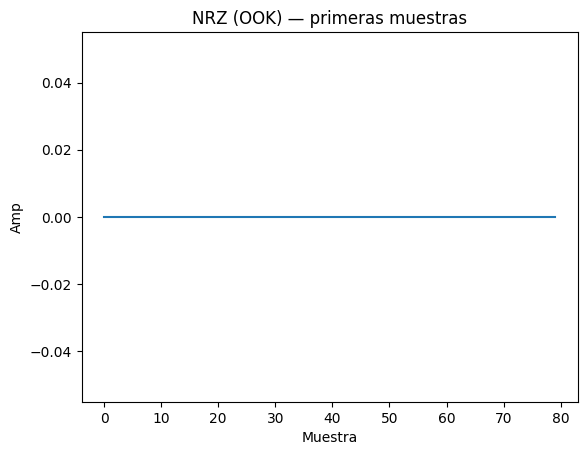

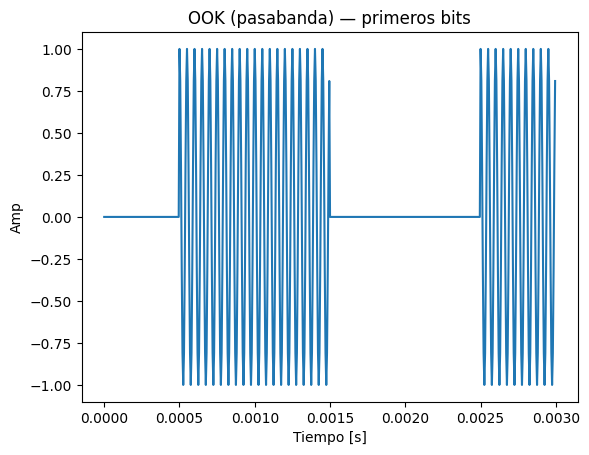

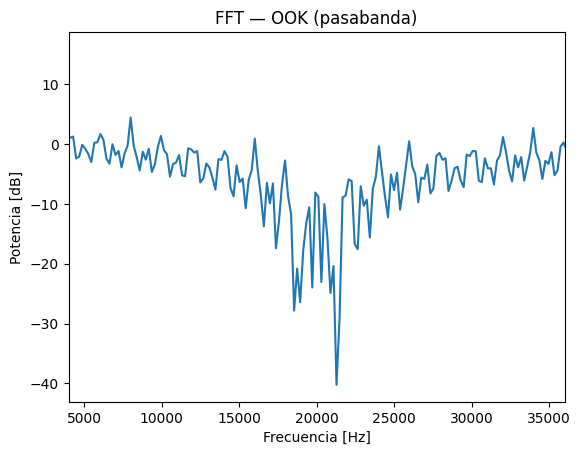

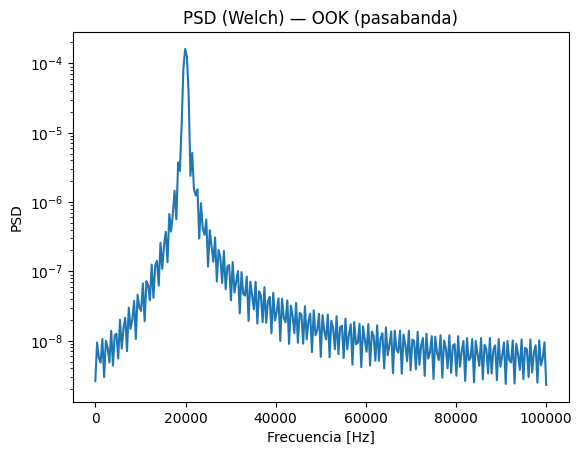

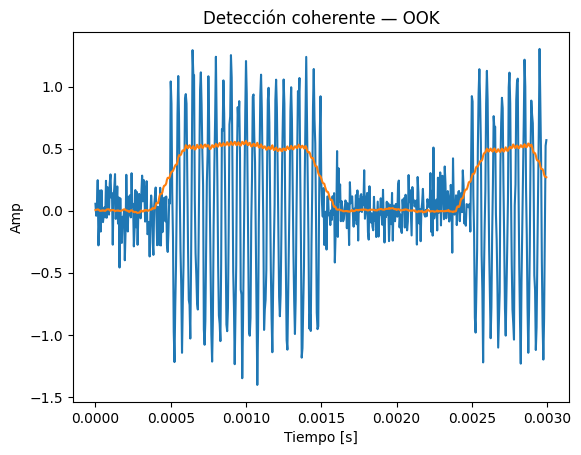

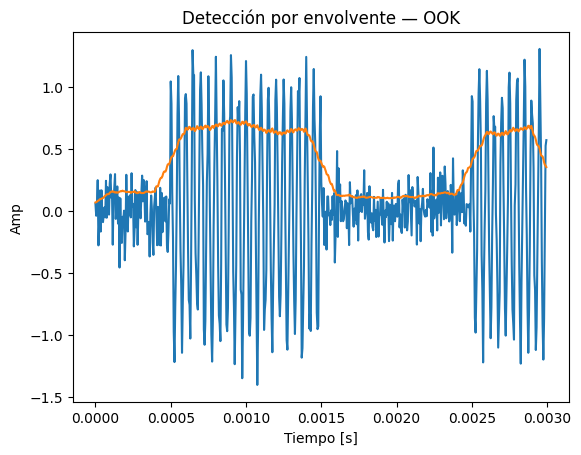

Bits (verdad):      [0 1 1 0 0 1]
Detectados (OOK coh.): [0 1 1 0 0 1]
Detectados (OOK env.): [0 1 1 0 0 1]


In [14]:
# ========= Override con tu secuencia y modo =========
# Interpreto "d = [0,1,1,0,01]" como [0, 1, 1, 0, 0, 1]
custom_bits = np.array([0, 1, 1, 0, 0, 1], dtype=int)

# Reutilizamos los parámetros p definidos arriba
p2 = SimParams(fs=p.fs, Rb=p.Rb, fc=p.fc, Nb=len(custom_bits))
t2 = time_axis(p2)

# Elige modo:
#   - 'OOK' => a0=0, a1=A
#   - '2ASK'=> a0=-A, a1=+A
modo = 'OOK'  # cambia a '2ASK' si quieres

A = 1.0
if modo.upper() == 'OOK':
    a0, a1 = 0.0, A
else:
    a0, a1 = -A, +A

# Baseband
bb = rect_pulse_train(custom_bits, p2.sps, a0, a1)

# Portadora y pasabanda
carrier2 = tone(p2.fc, t2, amp=1.0)
x2 = bb * carrier2

# Vistas en tiempo
nwin_t = 6 * p2.sps
tt2 = t2[:nwin_t]
plt.plot(bb[:80]); plt.title(f"NRZ ({modo}) — primeras muestras"); plt.xlabel("Muestra"); plt.ylabel("Amp"); plt.show()
plt.plot(tt2, x2[:nwin_t]); plt.title(f"{modo} (pasabanda) — primeros bits"); plt.xlabel("Tiempo [s]"); plt.ylabel("Amp"); plt.show()

# FFT y PSD
band_zoom = (p2.fc - 8*p2.Rb, p2.fc + 8*p2.Rb)
plot_fft_db(x2, p2.fs, f"FFT — {modo} (pasabanda)", flim=band_zoom)
plot_welch(x2, p2.fs, f"PSD (Welch) — {modo} (pasabanda)")

# Detección coherente + envolvente (si OOK)
SNRdB_vis = 10
x2_noisy = awgn(x2, SNRdB_vis)
yc, yc_f, samp_c = coherent_detect(x2_noisy, p2.fc, p2.fs, p2.sps, lp_len=41)
plt.plot(tt2, x2_noisy[:nwin_t]); plt.plot(tt2, yc_f[:nwin_t]); plt.title(f"Detección coherente — {modo}"); plt.xlabel("Tiempo [s]"); plt.ylabel("Amp"); plt.show()

# Decisiones
if modo.upper() == '2ASK':
    hat = (samp_c[:p2.Nb] >= 0).astype(int)
else:
    thr = 0.35
    hat = (samp_c[:p2.Nb] >= thr).astype(int)
    env = envelope_detect(x2_noisy, env_len=41)
    env_samp = env[p2.sps//2::p2.sps][:p2.Nb]
    hat_env = (env_samp >= thr).astype(int)
    plt.plot(tt2, x2_noisy[:nwin_t]); plt.plot(tt2, env[:nwin_t]); plt.title(f"Detección por envolvente — {modo}"); plt.xlabel("Tiempo [s]"); plt.ylabel("Amp"); plt.show()

print("Bits (verdad):     ", custom_bits)
print(f"Detectados ({modo} coh.):", hat[:len(custom_bits)])
if modo.upper() == 'OOK':
    print("Detectados (OOK env.):", hat_env[:len(custom_bits)])

# 🔹 Modulación WASK — Gaussian Amplitude Shift Keying

## 1. Definición general

La modulación **WASK** (Weighted ASK o Gaussian ASK) es una variante suavizada de ASK en la que el pulso del símbolo
no es rectangular, sino **gaussiano**, con el fin de reducir el ancho de banda y los lóbulos laterales del espectro.

La forma general de la señal transmitida es:

$$
s(t) = \sum_{i=-\infty}^{\infty} a_i \, v_i(t) \cos(\omega_0 t + \phi_0)
$$

donde:

- $a_i \in \{a_0,a_1\}$ son los niveles de amplitud asignados a cada bit.
- $v_i(t)$ es el **pulso gaussiano** de conformación.
- $\omega_0 = 2\pi f_c$ es la frecuencia angular de la portadora.
- $\phi_0$ es la fase inicial (constante).
- $T$ es la duración de símbolo.

---

## 2. Pulso gaussiano

El pulso gaussiano se define como:

$$
v_i(t) = e^{-\frac{(t - iT - T/2)^2}{2\sigma^2}}, \qquad t \in [iT,(i+1)T)
$$

donde:

- $\sigma$ controla el **ancho temporal** del pulso.  
  Valores menores de $\sigma$ generan pulsos más estrechos (mayor ancho de banda).  
- El factor $T/2$ centra el máximo del pulso en la mitad del símbolo.

---

## 3. Forma de la señal binaria WASK

Para símbolos binarios $d_i \in \{0,1\}$, el mapeo de amplitudes es:

$$
d_i = 0 \Rightarrow a_i = a_0, \qquad
d_i = 1 \Rightarrow a_i = a_1
$$

La señal se expresa como:

$$
s(t) = \sum_i a_i \, e^{-\frac{(t - iT - T/2)^2}{2\sigma^2}} \cos(\omega_0 t)
$$

y en la forma **bipolar** (niveles simétricos):

$$
s(t) = A \sum_i (2d_i - 1)\, e^{-\frac{(t - iT - T/2)^2}{2\sigma^2}} \cos(\omega_0 t)
$$

---

## 4. Forma equivalente en banda base

En banda base compleja, la representación es:

$$
s_{bb}(t) = A \sum_i (2d_i - 1)\, e^{-\frac{(t - iT - T/2)^2}{2\sigma^2}}
$$

y la señal pasabanda se obtiene mediante:

$$
s(t) = \Re \{\, s_{bb}(t) e^{j\omega_0 t} \,\}
$$

---

## 5. Potencia promedio

La potencia media transmitida es:

$$
P_{avg} = \frac{A^2}{2} \, E[(2d_i - 1)^2] = \frac{A^2}{2}
$$

(pues $E[(2d_i-1)^2] = 1$ para bits equiprobables).

---

## 6. Espectro de potencia

El espectro de potencia de la señal modulada se obtiene como el desplazamiento de la transformada de Fourier del pulso gaussiano:

1. Transformada de un pulso gaussiano:

$$
V(f) = \sigma\sqrt{2\pi}\, e^{-2(\pi \sigma f)^2}
$$

2. Al modular con la portadora $\cos(2\pi f_c t)$, aparecen dos réplicas en las frecuencias $\pm f_c$:

$$
S(f) = \frac{1}{4}\big[V(f-f_c) + V(f+f_c)\big]
$$

por lo que el **espectro de potencia** es:

$$
|S(f)|^2 = \frac{1}{16}\big[e^{-4(\pi \sigma (f-f_c))^2} + e^{-4(\pi \sigma (f+f_c))^2}\big]
$$

---

## 7. Propiedades principales

- **Envolvente suave:** el pulso gaussiano evita transiciones abruptas → menor interferencia espectral.
- **Ancho de banda reducido:** el espectro cae exponencialmente con $f^2$.
- **Robustez:** menos interferencia fuera de banda que el ASK rectangular.
- **Sensibilidad al ruido:** igual que ASK, pues se detecta la amplitud.

---

## 8. Parámetros clave

| Símbolo | Significado | Unidad |
|:--:|:--|:--:|
| $T$ | Duración del símbolo | s |
| $f_c$ | Frecuencia portadora | Hz |
| $\sigma$ | Desviación del pulso gaussiano | s |
| $a_i$ | Nivel de amplitud | V |
| $P_{avg}$ | Potencia media | W |

---

**Resumen:**
> WASK (Gaussian ASK) codifica los bits modificando la **amplitud** de la portadora,  
> pero empleando una **envolvente gaussiana** \(v_i(t)\) en lugar de rectangular,  
> lo que produce un **espectro más limpio y estrecho**.


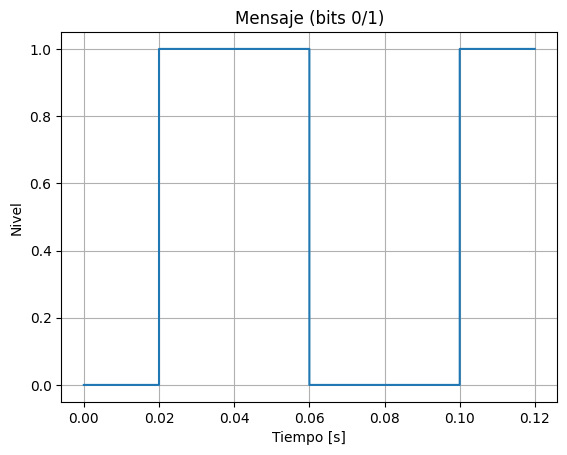

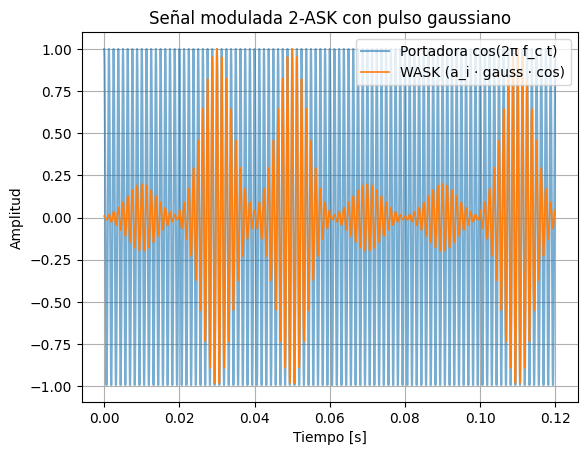

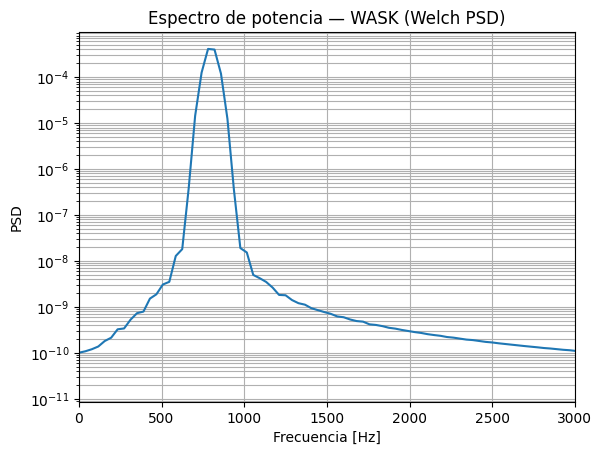

In [8]:
# -----------------------------------------------------
# 2-ASK (WASK) con pulso gaussiano — 3 gráficas:
# 1) Mensaje (bits 0/1 en escalera)
# 2) Señal modulada (envolvente gaussiana sobre coseno)
# 3) Espectro de potencia (PSD - Welch)
# -----------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

# Parámetros (tu secuencia)
bits = np.array([0,1,1,0,0,1])
fs   = 20_000         # Hz
Tsym = 0.02           # s por símbolo
fc   = 800            # Hz portadora
a0   = 0.2
a1   = 1.0
a_map = {0: a0, 1: a1}

# Pulso gaussiano
sigma_frac = 0.20            # σ = 0.20*T
sigma = sigma_frac * Tsym

# Ejes de tiempo
t_sym = np.arange(0, Tsym, 1/fs)
Nsym  = len(t_sym)
t     = np.concatenate([t_sym + k*Tsym for k in range(len(bits))])

# Construir envolvente gaussiana (WASK puro)
env_gauss = np.zeros_like(t)
for k, b in enumerate(bits):
    idx0, idx1 = k*Nsym, (k+1)*Nsym
    # pulso gaussiano centrado en la mitad del símbolo
    tt = (t[idx0:idx1] - (k*Tsym + Tsym/2.0))
    g  = np.exp(-0.5*(tt/sigma)**2)
    g  = g / (g.max() + 1e-16)         # normaliza pico a 1
    env_gauss[idx0:idx1] = a_map[int(b)] * g

# Señal modulada (2-ASK con gaussiana)
carrier = np.cos(2*np.pi*fc*t)
s_wask  = env_gauss * carrier

# --- PSD (Welch) ---
def welch_psd(x, fs, nperseg=2048, noverlap=1024):
    step = nperseg - noverlap
    w = np.hanning(nperseg)
    scale = np.sum(w**2) * fs
    P = []
    for start in range(0, len(x)-nperseg+1, step):
        seg = x[start:start+nperseg] * w
        X = np.fft.rfft(seg)
        P.append((np.abs(X)**2) / scale)
    if not P:
        # si la señal es corta respecto a nperseg, ajusta
        nperseg = min(len(x), 512)
        noverlap = nperseg//2
        return welch_psd(x, fs, nperseg, noverlap)
    Pxx = np.mean(P, axis=0)
    f   = np.fft.rfftfreq(nperseg, 1/fs)
    return f, Pxx

f_psd, Pxx = welch_psd(s_wask, fs, nperseg=4096, noverlap=2048)

# ----------------- GRÁFICA 1: Mensaje -----------------
plt.step(t, np.repeat(bits, Nsym), where='post')
plt.title('Mensaje (bits 0/1)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Nivel')
plt.grid(True)
plt.show()

# --------- GRÁFICA 2: Modulación (tiempo) --------------
plt.plot(t, carrier, label='Portadora cos(2π f_c t)', alpha=0.6)
plt.plot(t, s_wask, label='WASK (a_i · gauss · cos)', linewidth=1.2)
plt.title('Señal modulada 2-ASK con pulso gaussiano')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

# ---- GRÁFICA 3: Espectro de potencia (PSD - Welch) ----
plt.semilogy(f_psd, Pxx)
plt.title('Espectro de potencia — WASK (Welch PSD)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD')
plt.grid(True, which='both')
plt.xlim(0, 3000)  # zoom útil alrededor de la portadora y lóbulos
plt.show()

# 🔹 Modulación WPSK — Gaussian Phase Shift Keying

## 1. Definición general

La modulación **WPSK** (Weighted o Gaussian PSK) es una variante de la modulación por desplazamiento de fase (**PSK**)  
en la que cada símbolo se modula en **fase**, manteniendo **amplitud constante**, y se usa un **pulso gaussiano**
para suavizar las transiciones entre símbolos.

La forma general de la señal transmitida es:

$$
s(t) = A \sum_{i=-\infty}^{\infty} v_i(t)\cos(\omega_0 t + \phi_i)
$$

donde:

- $A$ es la amplitud constante de la portadora.
- $v_i(t)$ es el **pulso gaussiano** del símbolo $i$ (ponderación temporal).
- $\phi_i$ es la **fase** asignada según el bit transmitido.
- $\omega_0 = 2\pi f_c$ es la frecuencia angular de la portadora.

---

## 2. Asignación de fase

Para la versión binaria (BPSK con envolvente gaussiana):

$$
d_i \in \{0,1\}, \qquad \phi_i = a_i \pi, \quad \text{con } a_i = d_i
$$

es decir:

$$
d_i = 0 \Rightarrow \phi_i = 0, \qquad
d_i = 1 \Rightarrow \phi_i = \pi
$$

Por tanto, la fase de la portadora cambia **180°** entre símbolos de distinto valor,  
y permanece constante cuando los bits consecutivos son iguales.

---

## 3. Pulso gaussiano de conformación

El pulso aplicado a cada símbolo se define como:

$$
v_i(t) = e^{-\frac{(t - iT - T/2)^2}{2\sigma^2}}, \qquad t \in [iT, (i+1)T)
$$

donde:

- $T$ es la duración del símbolo.  
- $\sigma$ es el **parámetro de dispersión temporal** que controla la suavidad de la envolvente.

De esta manera, la señal resultante tiene una **transición continua** en fase y amplitud.

---

## 4. Forma explícita de la señal WPSK

Sustituyendo en la ecuación general:

$$
s(t) = A \sum_i e^{-\frac{(t - iT - T/2)^2}{2\sigma^2}}
        \cos(\omega_0 t + a_i \pi)
$$

usando la identidad $\cos(\theta + \pi) = -\cos(\theta)$, se obtiene:

$$
s(t) = A \sum_i (2d_i - 1)\, e^{-\frac{(t - iT - T/2)^2}{2\sigma^2}} \cos(\omega_0 t)
$$

Esto muestra que **WPSK** tiene la misma forma que WASK,  
pero la variación se da en la **fase** de la portadora, no en su amplitud.

---

## 5. Representación en banda base

En forma compleja:

$$
s_{bb}(t) = A \sum_i v_i(t) e^{j\phi_i}
$$

y la señal pasabanda se obtiene como:

$$
s(t) = \Re \{\, s_{bb}(t) e^{j\omega_0 t} \,\}
$$

---

## 6. Potencia promedio

Dado que la amplitud es constante:

$$
P_{avg} = \frac{A^2}{2}
$$

La potencia es **independiente del símbolo** transmitido.

---

## 7. Espectro de potencia

El espectro de potencia se obtiene desplazando la transformada del pulso gaussiano
a las frecuencias $\pm f_c$.

1. Transformada del pulso gaussiano:

$$
V(f) = \sigma \sqrt{2\pi}\, e^{-2(\pi \sigma f)^2}
$$

2. Espectro total:

$$
S(f) = \frac{A}{2}\big[V(f - f_c) + V(f + f_c)\big]
$$

3. Espectro de potencia:

$$
|S(f)|^2 = \frac{A^2}{4}\big[e^{-4(\pi \sigma (f-f_c))^2} + e^{-4(\pi \sigma (f+f_c))^2}\big]
$$

---

## 8. Propiedades principales

- **Fase binaria:** $\phi_i = 0$ o $\pi$ según el bit transmitido.
- **Amplitud constante:** no se modula la envolvente, sólo la fase.
- **Pulso gaussiano:** suaviza las transiciones entre símbolos.
- **Mejor eficiencia espectral** que el PSK rectangular (menos lóbulos laterales).
- **Potencia constante:** ideal para transmisores no lineales.

---

## 9. Parámetros clave

| Símbolo | Significado | Unidad |
|:--:|:--|:--:|
| $T$ | Duración del símbolo | s |
| $f_c$ | Frecuencia portadora | Hz |
| $\sigma$ | Desviación del pulso gaussiano | s |
| $\phi_i$ | Fase del símbolo | rad |
| $A$ | Amplitud constante | V |

---

**Resumen:**
> La modulación WPSK codifica los bits modificando la **fase** de la portadora  
> (0 o π según el bit), manteniendo la **amplitud constante** y usando un  
> **pulso gaussiano** \(v_i(t)\) que suaviza las transiciones, reduciendo el ancho de banda.


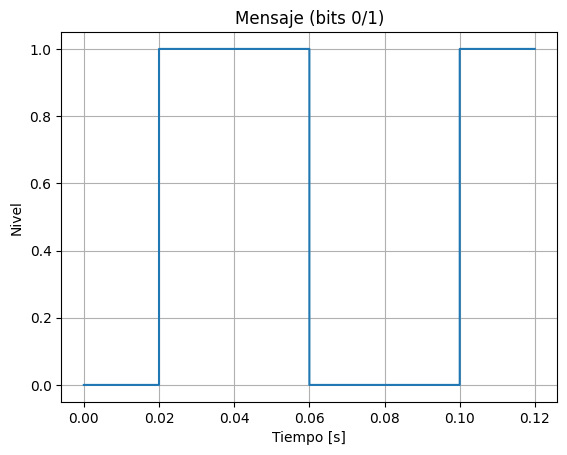

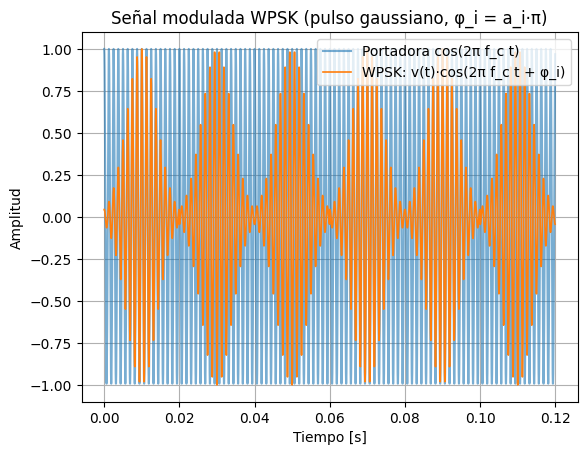

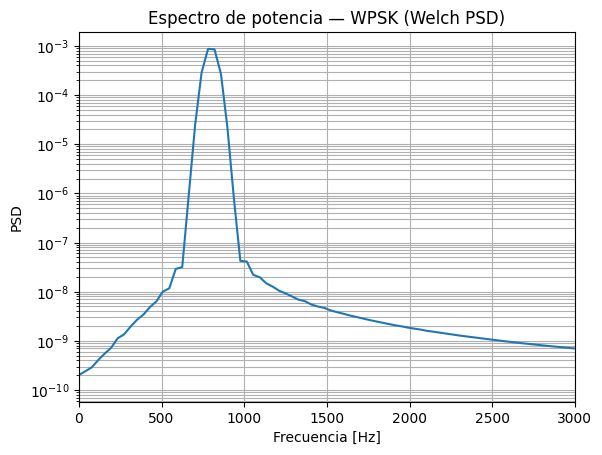

In [9]:
# -----------------------------------------------------
# WPSK (BPSK con v(t) gaussiano): phi_i = a_i * pi
# 1) bits (mensaje)
# 2) señal modulada vs portadora
# 3) espectro de potencia (PSD - Welch)
# -----------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

# --------- Parámetros (misma secuencia y tiempos) ---------
bits = np.array([0,1,1,0,0,1])
fs   = 20_000         # Hz muestreo
Tsym = 0.02           # s por símbolo
fc   = 800            # Hz portadora
rasp
# Pulso gaussiano
sigma_frac = 0.20                # σ = 0.20*T
sigma = sigma_frac * Tsym

# Ejes de tiempo
t_sym = np.arange(0, Tsym, 1/fs)
Nsym  = len(t_sym)
t     = np.concatenate([t_sym + k*Tsym for k in range(len(bits))])

# --------- Construcción del pulso gaussiano por símbolo ---------
# v_i(t) gaussiano centrado en la mitad de cada símbolo
v = np.zeros_like(t)
for k in range(len(bits)):
    idx0, idx1 = k*Nsym, (k+1)*Nsym
    tt = (t[idx0:idx1] - (k*Tsym + Tsym/2.0))
    g  = np.exp(-0.5*(tt/sigma)**2)
    g  = g / (g.max() + 1e-16)           # normalizar pico a 1
    v[idx0:idx1] = g

# --------- Fase por símbolo: phi_i = a_i * pi, con a_i = bit ---------
# a_i ∈ {0,1} -> phi_i ∈ {0, pi}
phi = np.zeros_like(t)
for k, b in enumerate(bits):
    idx0, idx1 = k*Nsym, (k+1)*Nsym
    phi[idx0:idx1] = (int(b) * np.pi)

# --------- Señal modulada WPSK ---------
A_env  = 1.0                          # amplitud de envolvente (constante)
carrier = np.cos(2*np.pi*fc*t)
s_wpsk  = A_env * v * np.cos(2*np.pi*fc*t + phi)

# --------- PSD (Welch) ---------
def welch_psd(x, fs, nperseg=4096, noverlap=2048):
    step = nperseg - noverlap
    w = np.hanning(nperseg)
    scale = np.sum(w**2) * fs
    P = []
    for start in range(0, len(x)-nperseg+1, step):
        seg = x[start:start+nperseg] * w
        X = np.fft.rfft(seg)
        P.append((np.abs(X)**2)/scale)
    if not P:
        nperseg = min(len(x), 512)
        noverlap = nperseg // 2
        return welch_psd(x, fs, nperseg, noverlap)
    Pxx = np.mean(P, axis=0)
    f   = np.fft.rfftfreq(nperseg, 1/fs)
    return f, Pxx

f_psd, Pxx = welch_psd(s_wpsk, fs, nperseg=4096, noverlap=2048)

# ================== GRÁFICA 1: Mensaje (bits) ==================
plt.step(t, np.repeat(bits, Nsym), where='post')
plt.title('Mensaje (bits 0/1)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Nivel')
plt.grid(True)
plt.show()

# ===== GRÁFICA 2: Modulación (portadora y señal WPSK) =====
plt.plot(t, carrier, label='Portadora cos(2π f_c t)', alpha=0.6)
plt.plot(t, s_wpsk, label='WPSK: v(t)·cos(2π f_c t + φ_i)', linewidth=1.2)
plt.title('Señal modulada WPSK (pulso gaussiano, φ_i = a_i·π)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

# ======== GRÁFICA 3: Espectro de potencia (PSD - Welch) ========
plt.semilogy(f_psd, Pxx)
plt.title('Espectro de potencia — WPSK (Welch PSD)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD')
plt.grid(True, which='both')
plt.xlim(0, 3000)  # zoom útil
plt.show()

# 🔹 Modulación WFSK — Gaussian Frequency Shift Keying

## 1. Definición general

La modulación **WFSK** (Weighted o Gaussian FSK) pertenece a la familia de modulaciones por **desplazamiento de frecuencia**,
en la que la **frecuencia instantánea** de la portadora varía según el símbolo digital transmitido.

A diferencia de la FSK tradicional, en **WFSK** cada símbolo está **suavizado por un pulso gaussiano** \(v_i(t)\),
que controla la forma temporal de la frecuencia y la amplitud de transición entre símbolos.

La forma general es:

$$
s(t) = A \sum_{i=-\infty}^{\infty} v_i(t)\cos\!\left( 2\pi f_i t + \phi_i \right)
$$

donde:

- \(A\) es la amplitud constante.
- \(f_i\) es la frecuencia asociada al bit transmitido.
- \(\phi_i\) es la fase inicial del símbolo (puede depender de \(a_i\)).
- \(v_i(t)\) es el **pulso gaussiano** de conformación.
- \(T\) es la duración de cada símbolo.

---

## 2. Asignación de frecuencias y fase

Para la modulación binaria:

$$
d_i \in \{0,1\}, \qquad
f_i = f_c + (2d_i - 1)\,\Delta f, \qquad
\phi_i = a_i\pi, \quad a_i = d_i
$$

por tanto:

- bit 0 → \(f_i = f_c - \Delta f, \, \phi_i = 0\)
- bit 1 → \(f_i = f_c + \Delta f, \, \phi_i = \pi\)

de modo que cada símbolo usa una frecuencia distinta, y la fase se invierte opcionalmente según \(a_i\).

---

## 3. Pulso gaussiano de conformación

El pulso suavizador \(v_i(t)\) se define como:

$$
v_i(t) = e^{-\frac{(t - iT - T/2)^2}{2\sigma^2}}, \qquad t \in [iT, (i+1)T)
$$

donde:

- \(T\) es la duración del símbolo.
- \(\sigma\) controla la **anchura temporal** del pulso (y, por tanto, el ancho de banda espectral).

---

## 4. Expresión explícita de la señal WFSK

Sustituyendo en la ecuación general:

$$
s(t) = A \sum_i
  e^{-\frac{(t - iT - T/2)^2}{2\sigma^2}}
  \cos\!\left[ 2\pi (f_c + (2d_i-1)\Delta f)t + a_i\pi \right]
$$

---

## 5. Representación de la frecuencia instantánea

La **frecuencia instantánea** se puede escribir como:

$$
f_{\text{inst}}(t) = f_c + (2d_i-1)\Delta f \cdot g(t)
$$

donde \(g(t)\) es una función gaussiana normalizada derivada de \(v_i(t)\),
lo que garantiza que la **frecuencia cambie suavemente** entre símbolos.

---

## 6. Representación en banda base

La señal en banda base compleja es:

$$
s_{bb}(t) = A \sum_i v_i(t)\, e^{j[2\pi(2d_i-1)\Delta f\,t + a_i\pi]}
$$

y la señal pasabanda resulta de:

$$
s(t) = \Re \{\, s_{bb}(t)\, e^{j2\pi f_c t} \,\}
$$

---

## 7. Potencia promedio

Dado que la amplitud es constante, la potencia promedio transmitida es:

$$
P_{avg} = \frac{A^2}{2}
$$

---

## 8. Espectro de potencia

El espectro de potencia de WFSK puede aproximarse como la suma de dos espectros gaussianos centrados en
\(f_c \pm \Delta f\):

1. Transformada del pulso gaussiano:

$$
V(f) = \sigma\sqrt{2\pi}\, e^{-2(\pi\sigma f)^2}
$$

2. Espectro total de la señal modulada:

$$
S(f) = \frac{A}{2}\left[V(f - (f_c - \Delta f)) + V(f - (f_c + \Delta f))\right]
$$

3. Espectro de potencia:

$$
|S(f)|^2 = \frac{A^2}{4}\left[e^{-4(\pi\sigma(f-f_c+\Delta f))^2} + e^{-4(\pi\sigma(f-f_c-\Delta f))^2}\right]
$$

---

## 9. Propiedades principales

- **Cambio en frecuencia** según el bit transmitido.  
- **Pulso gaussiano** → transiciones continuas y ancho de banda reducido.  
- **Envolvente constante** → buena eficiencia energética.  
- Si \(v_i(t)\) es rectangular, se recupera la **FSK convencional**.

---

## 10. Parámetros clave

| Símbolo | Significado | Unidad |
|:--:|:--|:--:|
| \(T\) | Duración del símbolo | s |
| \(f_c\) | Frecuencia central | Hz |
| \(\Delta f\) | Desviación de frecuencia | Hz |
| \(\sigma\) | Ancho temporal del pulso gaussiano | s |
| \(A\) | Amplitud de portadora | V |

---

**Resumen:**
> La modulación WFSK varía la **frecuencia de la portadora** entre dos valores
> \(f_c \pm \Delta f\) según el bit transmitido, usando un **pulso gaussiano**
> para suavizar las transiciones.  
> Esto reduce la interferencia entre símbolos y mejora el comportamiento espectral
> respecto a la FSK rectangular.


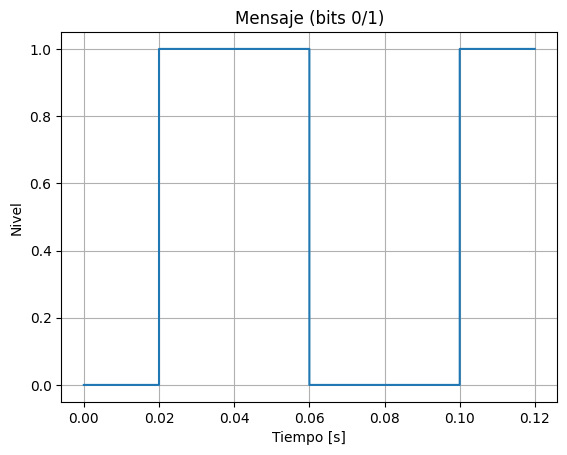

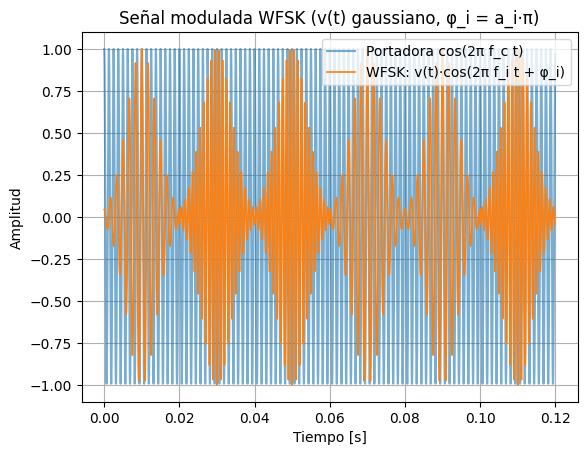

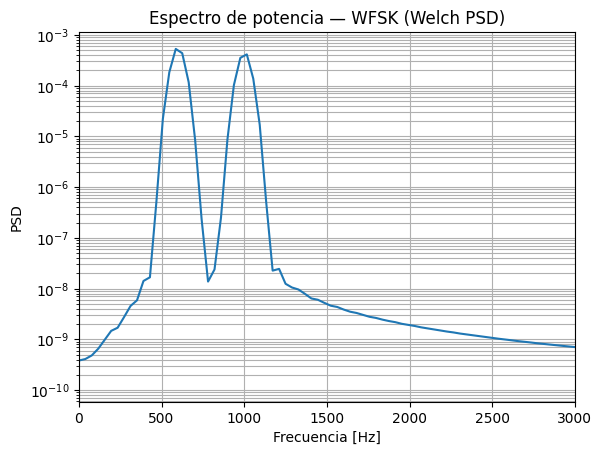

In [10]:
# -----------------------------------------------------
# WFSK (Binary FSK con v(t) gaussiano) y fase por símbolo:
#    phi_i = a_i * pi, con a_i = bit ∈ {0,1}
# Gráficas:
#   1) Mensaje (bits 0/1)
#   2) Portadora vs señal FSK (tiempo)
#   3) Espectro de potencia (PSD - Welch)
# -----------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

# --------- Parámetros (puedes mantener tu misma secuencia) ---------
bits = np.array([0,1,1,0,0,1])
fs   = 20_000        # Hz muestreo
Tsym = 0.02          # s por símbolo
fc   = 800           # Hz portadora central
df   = 200           # Hz desvío (f0 = fc - df, f1 = fc + df)

# Pulso gaussiano v(t) por símbolo
sigma_frac = 0.20                # σ = 0.20*T  (ajustable)
sigma = sigma_frac * Tsym

# Ejes de tiempo
t_sym = np.arange(0, Tsym, 1/fs)
Nsym  = len(t_sym)
t     = np.concatenate([t_sym + k*Tsym for k in range(len(bits))])

# --------- v_i(t): gaussiano centrado en mitad de símbolo ----------
v = np.zeros_like(t)
for k in range(len(bits)):
    idx0, idx1 = k*Nsym, (k+1)*Nsym
    tt = (t[idx0:idx1] - (k*Tsym + Tsym/2.0))
    g  = np.exp(-0.5*(tt/sigma)**2)
    g  = g / (g.max() + 1e-16)    # normalizar pico a 1
    v[idx0:idx1] = g

# --------- Frecuencia y fase por símbolo ---------------------------
# f_i = fc ± df (según bit);  phi_i = a_i*pi (a_i = bit)
f_inst = np.zeros_like(t)
phi    = np.zeros_like(t)
for k, b in enumerate(bits):
    idx0, idx1 = k*Nsym, (k+1)*Nsym
    f_i = fc + (df if b==1 else -df)
    f_inst[idx0:idx1] = f_i
    phi[idx0:idx1]    = (int(b) * np.pi)     # 0 o π, como pediste

# --------- Señal FSK con v(t) gaussiano y phi_i --------------------
carrier = np.cos(2*np.pi*fc*t)              # referencia
s_wfsk  = v * np.cos(2*np.pi*f_inst*t + phi)

# --------- PSD (Welch) ---------------------------------------------
def welch_psd(x, fs, nperseg=4096, noverlap=2048):
    step = nperseg - noverlap
    w = np.hanning(nperseg)
    scale = np.sum(w**2) * fs
    P = []
    for start in range(0, len(x)-nperseg+1, step):
        seg = x[start:start+nperseg] * w
        X = np.fft.rfft(seg)
        P.append((np.abs(X)**2)/scale)
    if not P:
        nperseg = min(len(x), 512)
        noverlap = nperseg//2
        return welch_psd(x, fs, nperseg, noverlap)
    Pxx = np.mean(P, axis=0)
    f   = np.fft.rfftfreq(nperseg, 1/fs)
    return f, Pxx

f_psd, Pxx = welch_psd(s_wfsk, fs, nperseg=4096, noverlap=2048)

# ================== GRÁFICA 1: Mensaje (bits) ==================
plt.step(t, np.repeat(bits, Nsym), where='post')
plt.title('Mensaje (bits 0/1)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Nivel')
plt.grid(True)
plt.show()

# ===== GRÁFICA 2: Modulación (portadora vs WFSK) =====
plt.plot(t, carrier, label='Portadora cos(2π f_c t)', alpha=0.6)
plt.plot(t, s_wfsk, label='WFSK: v(t)·cos(2π f_i t + φ_i)', linewidth=1.2)
plt.title('Señal modulada WFSK (v(t) gaussiano, φ_i = a_i·π)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

# ======== GRÁFICA 3: Espectro de potencia (PSD - Welch) ========
plt.semilogy(f_psd, Pxx)
plt.title('Espectro de potencia — WFSK (Welch PSD)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD')
plt.grid(True, which='both')
plt.xlim(0, 3000)  # zoom útil (ajusta según fc y df)
plt.show()

# 🔹 Modulación BPSK — Binary Phase Shift Keying

## 1. Definición general

La modulación **BPSK** (Binary Phase Shift Keying) pertenece a la familia de modulaciones por desplazamiento de fase (**PSK**), en la cual la **fase** de la portadora cambia entre dos valores posibles dependiendo del bit transmitido.

La forma general de la señal modulada es:

$$
s(t) = A \sum_i v_i(t) \cos(\omega_0 t + \phi_i)
$$

donde:

- $A$ es la amplitud constante de la portadora.  
- $v_i(t)$ es el **pulso rectangular** que define la duración del símbolo.  
- $\omega_0 = 2\pi f_c$ es la frecuencia angular de la portadora.  
- $\phi_i$ es la fase asociada al bit $d_i$.  

---

## 2. Asignación de fase binaria

Para la versión binaria de PSK, la fase se asigna como:

$$
\phi_i = d_i \pi, \quad d_i \in \{0,1\}
$$

por tanto:

$$
\begin{cases}
d_i = 0 \Rightarrow \phi_i = 0 \\[6pt]
d_i = 1 \Rightarrow \phi_i = \pi
\end{cases}
$$

Al sustituir en la ecuación general:

$$
s(t) = A \sum_i v_i(t) \cos(\omega_0 t + d_i\pi)
$$

usando la identidad trigonométrica $\cos(\theta + \pi) = -\cos(\theta)$, se obtiene:

$$
s(t) = A \sum_i (2d_i - 1) \, v_i(t) \cos(\omega_0 t)
$$

---

## 3. Pulso rectangular $v_i(t)$

En este caso se usa un **pulso rectangular** de amplitud $\gamma$ y duración $T$:

$$
v_i(t) =
\begin{cases}
\gamma, & t \in [iT, (i+1)T) \\[4pt]
0, & \text{en otro caso}
\end{cases}
$$

por lo que cada bit ocupa un intervalo $T$ de tiempo, y la señal tiene **fase constante** dentro de cada símbolo, pero cambia 180° entre símbolos diferentes.

---

## 4. Representación en banda base

En banda base compleja, la señal equivalente se puede expresar como:

$$
s_{bb}(t) = A \sum_i (2d_i - 1)\,v_i(t)
$$

y la señal pasabanda como:

$$
s(t) = \Re\{\, s_{bb}(t) e^{j\omega_0 t} \,\}
$$

donde $\Re\{\cdot\}$ representa la parte real.

---

## 5. Potencia media transmitida

Dado que la amplitud es constante e independiente del símbolo:

$$
P_{avg} = \frac{A^2}{2}
$$

la potencia media no depende del bit transmitido.

---

## 6. Espectro de potencia

Si $v_i(t)$ es un pulso rectangular de duración $T$, su transformada de Fourier es:

$$
V(f) = T \, \mathrm{sinc}(fT)
$$

y la modulación BPSK genera dos réplicas del espectro centradas en las frecuencias $\pm f_c$:

$$
S(f) = \frac{A}{2}\left[V(f - f_c) + V(f + f_c)\right]
$$

Por tanto, el **espectro de potencia** de la BPSK tiene forma $\mathrm{sinc}^2$, con lóbulos laterales que decrecen como $1/f^2$.

---

## 7. Propiedades principales

- **Amplitud constante:** evita distorsión en amplificadores no lineales.  
- **Fase binaria:** cada bit produce un cambio de fase de $180^\circ$.  
- **Potencia media constante:** $P_{avg}=A^2/2$.  
- **Espectro $\mathrm{sinc}^2$:** por el pulso rectangular.  
- **Muy robusta ante ruido:** mejor desempeño que ASK en canales AWGN.

---

## 8. Parámetros clave

| Símbolo | Significado | Unidad |
|:--:|:--|:--:|
| $T$ | Duración del símbolo | s |
| $f_c$ | Frecuencia portadora | Hz |
| $\omega_0$ | Frecuencia angular $2\pi f_c$ | rad/s |
| $\phi_i$ | Fase del símbolo | rad |
| $\gamma$ | Amplitud del pulso rectangular | V |
| $A$ | Amplitud de la portadora | V |

---

## 9. Resumen conceptual

> La modulación **BPSK** representa cada bit mediante un cambio de **fase de 180°** de la portadora.  
>  
> La señal tiene la forma:
> $$
> s(t) = A (2d_i - 1) \cos(\omega_0 t)
> $$
>  
> con potencia constante y fase discontinua entre símbolos.


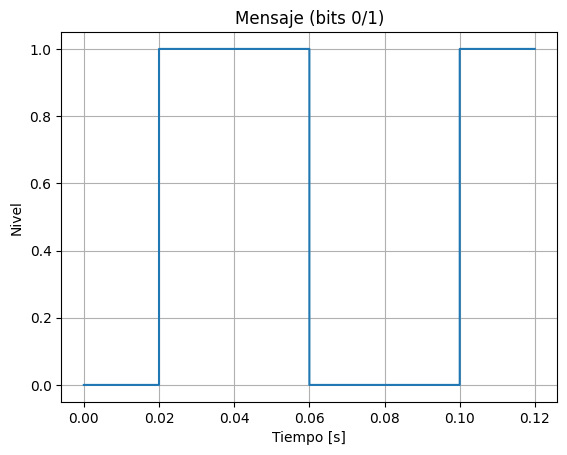

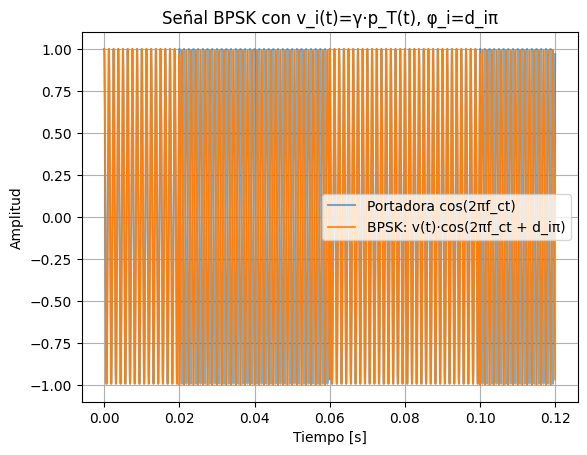

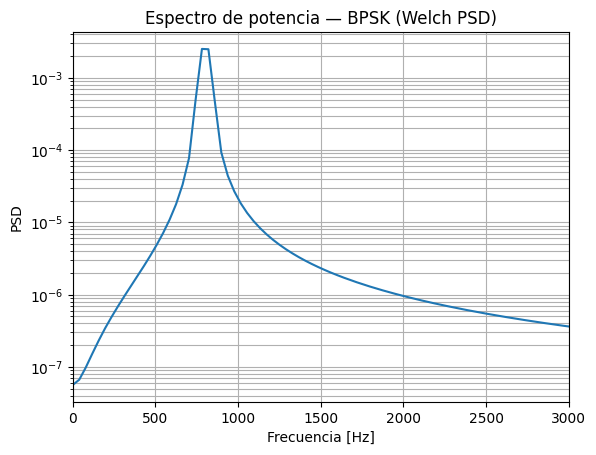

In [11]:
# -----------------------------------------------------
# BPSK con v_i(t) = γ · p_T(t)  y  φ_i = d_i · π
# Gráficas:
#   1) Bits (mensaje)
#   2) Portadora y señal BPSK en el tiempo
#   3) Espectro de potencia (PSD - Welch)
# -----------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

# ----- Parámetros -----
bits = np.array([0,1,1,0,0,1])  # tu misma secuencia
fs   = 20_000                   # Hz muestreo
Tsym = 0.02                     # s por símbolo
fc   = 800                      # Hz portadora
gamma = 1.0                     # γ (amplitud del pulso rectangular p_T)

# ----- Ejes de tiempo y pulso p_T(t) -----
t_sym = np.arange(0, Tsym, 1/fs)
Nsym  = len(t_sym)
t     = np.concatenate([t_sym + k*Tsym for k in range(len(bits))])

# v_i(t) = γ · p_T(t)  (rectangular = γ dentro del símbolo)
v = np.zeros_like(t)
for k in range(len(bits)):
    v[k*Nsym:(k+1)*Nsym] = gamma

# φ_i = d_i π  (0 o π por símbolo)
phi = np.zeros_like(t)
for k, b in enumerate(bits):
    phi[k*Nsym:(k+1)*Nsym] = int(b) * np.pi

# Señales
carrier = np.cos(2*np.pi*fc*t)                # referencia
s_bpsk  = v * np.cos(2*np.pi*fc*t + phi)      # BPSK con p_T rectangular

# ----- PSD (Welch) -----
def welch_psd(x, fs, nperseg=4096, noverlap=2048):
    step = nperseg - noverlap
    w = np.hanning(nperseg)
    scale = np.sum(w**2)*fs
    P = []
    for i in range(0, len(x)-nperseg+1, step):
        seg = x[i:i+nperseg]*w
        X = np.fft.rfft(seg)
        P.append((np.abs(X)**2)/scale)
    if not P:
        nperseg = min(len(x), 512); noverlap = nperseg//2
        return welch_psd(x, fs, nperseg, noverlap)
    Pxx = np.mean(P, axis=0)
    f   = np.fft.rfftfreq(nperseg, 1/fs)
    return f, Pxx

f_psd, Pxx = welch_psd(s_bpsk, fs, nperseg=4096, noverlap=2048)

# ========== Gráfica 1: Bits ==========
plt.step(t, np.repeat(bits, Nsym), where='post')
plt.title('Mensaje (bits 0/1)')
plt.xlabel('Tiempo [s]'); plt.ylabel('Nivel')
plt.grid(True); plt.show()

# ========== Gráfica 2: Modulación en el tiempo ==========
win = 6*Nsym  # ~6 símbolos
plt.plot(t[:win], carrier[:win], label='Portadora cos(2πf_ct)', alpha=0.6)
plt.plot(t[:win], s_bpsk[:win],  label='BPSK: v(t)·cos(2πf_ct + d_iπ)', linewidth=1.2)
plt.title('Señal BPSK con v_i(t)=γ·p_T(t), φ_i=d_iπ')
plt.xlabel('Tiempo [s]'); plt.ylabel('Amplitud')
plt.legend(); plt.grid(True); plt.show()

# ========== Gráfica 3: Espectro de potencia (PSD) ==========
plt.semilogy(f_psd, Pxx)
plt.title('Espectro de potencia — BPSK (Welch PSD)')
plt.xlabel('Frecuencia [Hz]'); plt.ylabel('PSD')
plt.grid(True, which='both'); plt.xlim(0, 3000)  # zoom útil
plt.show()

# 🔹 Modulación BFSK — Binary Frequency Shift Keying

## 1. Definición general

La modulación **BFSK** (Binary Frequency Shift Keying) es una técnica en la que cada símbolo binario modula la **frecuencia** de la portadora.  
Los bits se representan mediante **dos frecuencias distintas**, normalmente simétricas respecto a una frecuencia central $f_c$.

La forma general de la señal transmitida es:

$$
s(t) = A \sum_i v_i(t) \cos\!\big(2\pi f_i t + \phi_i\big)
$$

donde:

- $A$ es la amplitud constante de la portadora.  
- $v_i(t)$ es el **pulso rectangular** que define la duración del símbolo.  
- $f_i$ es la frecuencia asignada al bit transmitido.  
- $\phi_i$ es la fase inicial del símbolo (puede mantenerse continua).  
- $T$ es la duración de cada símbolo.

---

## 2. Asignación de frecuencias binaria

Para los bits $d_i \in \{0,1\}$, se define:

$$
f_i = f_c + (2d_i - 1)\,\Delta f
$$

por tanto:

$$
\begin{cases}
d_i = 0 \Rightarrow f_i = f_c - \Delta f \\[6pt]
d_i = 1 \Rightarrow f_i = f_c + \Delta f
\end{cases}
$$

donde $\Delta f$ es la **desviación de frecuencia** respecto a la portadora central $f_c$.

---

## 3. Pulso rectangular

El pulso de cada símbolo se define como:

$$
v_i(t) =
\begin{cases}
\gamma, & t \in [iT, (i+1)T) \\[4pt]
0, & \text{en otro caso}
\end{cases}
$$

por lo que la frecuencia se mantiene **constante dentro de cada símbolo**, y cambia al comienzo de un nuevo símbolo.

---

## 4. Señal completa

Sustituyendo los términos anteriores, la señal BFSK se expresa como:

$$
s(t) = A \sum_i \gamma \cos\!\big[ 2\pi(f_c + (2d_i - 1)\Delta f)t + \phi_i \big]
$$

o, si la fase se mantiene continua (CPFSK simplificada):

$$
s(t) = A \cos\!\left( 2\pi f_c t + 2\pi \int_0^t (2d_i(\tau)-1)\Delta f\,d\tau \right)
$$

---

## 5. Variante con rúbrica temporal

En tus rúbricas, definimos un **factor de tiempo interno** dentro de cada símbolo:

$$
u_i(t) = (2d_i - 1)t, \quad t \in [0, T)
$$

lo que permite una **frecuencia instantánea** que varía linealmente dentro del símbolo:

$$
f_i(t) = f_c + \Delta f \, (2d_i - 1)t
$$

entonces la fase instantánea se obtiene integrando esa frecuencia:

$$
\phi(t) = 2\pi \int_0^t f_i(\tau)\,d\tau
$$

y la señal final:

$$
s(t) = \gamma \cos\!\big(\phi(t)\big)
$$

---

## 6. Forma en banda base

La señal en banda base equivalente es:

$$
s_{bb}(t) = A \sum_i v_i(t)\, e^{j2\pi(2d_i-1)\Delta f\,t}
$$

y la forma pasabanda:

$$
s(t) = \Re\{\, s_{bb}(t) e^{j2\pi f_c t} \,\}
$$

---

## 7. Potencia promedio

Como la amplitud $A$ es constante, la potencia media transmitida es:

$$
P_{avg} = \frac{A^2}{2}
$$

independiente del bit transmitido.

---

## 8. Espectro de potencia

El espectro de potencia de una BFSK ideal (con pulsos rectangulares) tiene **dos lóbulos principales** centrados en las frecuencias $f_c \pm \Delta f$:

$$
|S(f)|^2 \approx \frac{A^2 T^2}{4}\Big[
\mathrm{sinc}^2\!\big((f - (f_c + \Delta f))T\big) +
\mathrm{sinc}^2\!\big((f - (f_c - \Delta f))T\big)
\Big]
$$

Cuando se usa un pulso gaussiano, estos lóbulos se suavizan (caso WFSK).

---

## 9. Propiedades principales

- **Información en frecuencia**: cada bit cambia la frecuencia portadora.  
- **Envolvente constante**: permite amplificadores no lineales.  
- **Ancho de banda** depende de $\Delta f$ y $T$.  
- **Fase continua** en la práctica (CPFSK) para evitar saltos abruptos.  
- Si $v_i(t)$ es gaussiano, se obtiene la versión **WFSK**.

---

## 10. Parámetros clave

| Símbolo | Significado | Unidad |
|:--:|:--|:--:|
| $T$ | Duración del símbolo | s |
| $f_c$ | Frecuencia portadora central | Hz |
| $\Delta f$ | Desviación de frecuencia | Hz |
| $\gamma$ | Amplitud del pulso rectangular | V |
| $\phi_i$ | Fase inicial del símbolo | rad |

---

## 11. Resumen conceptual

> La modulación **BFSK** transmite cada bit mediante una **frecuencia distinta** de la portadora:  
> $f_c + \Delta f$ para bit 1, y $f_c - \Delta f$ para bit 0.  
>  
> La forma general es:
> $$
> s(t) = \gamma \cos\!\big[2\pi(f_c + (2d_i-1)\Delta f)t + \phi_i\big]
> $$
>  
> Su envolvente es constante y su espectro presenta dos lóbulos centrados en las frecuencias de los dos tonos binarios.


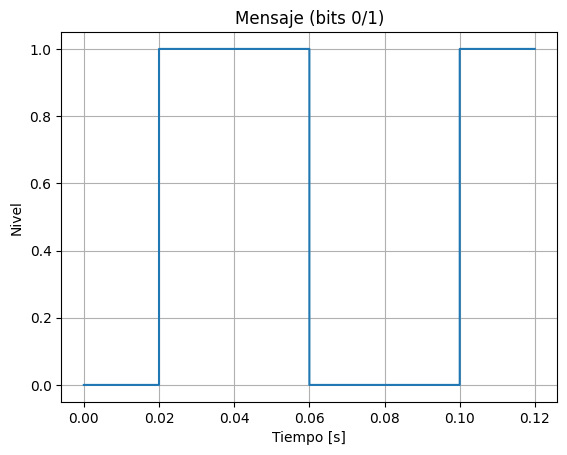

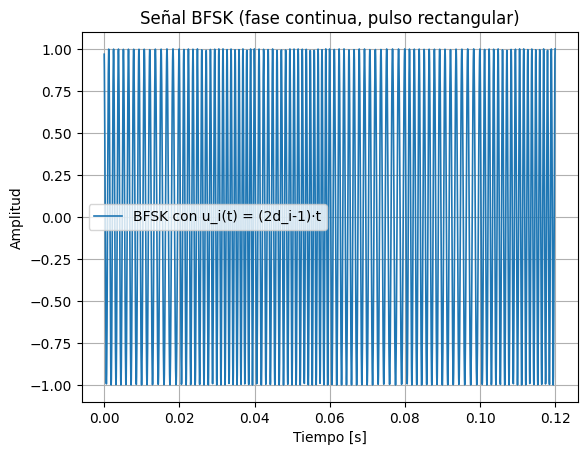

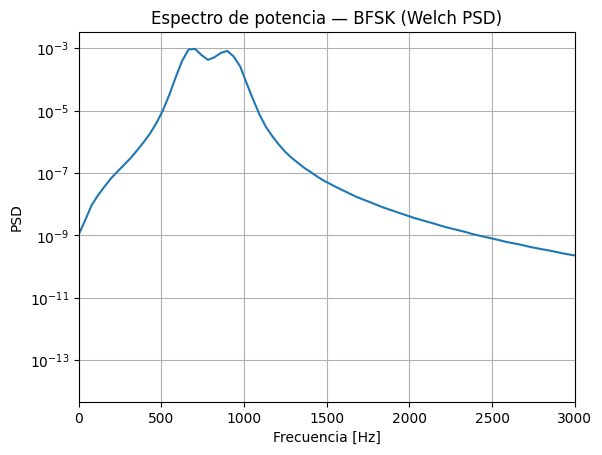

In [12]:
# -----------------------------------------------------
# BFSK con u_i(t) = (2 d_i - 1) * t  (versión normalizada)
# f_i(τ) = fc + df_max * (2 d_i - 1) * τ,   τ = t_local / Tsym
# v_i(t) = γ · p_T(t)  (pulso rectangular por símbolo)
# Gráficas: bits, señal BFSK (tiempo), PSD (Welch)
# -----------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
bits = np.array([0,1,1,0,0,1])
fs   = 20_000          # Hz (muestreo)
Tsym = 0.02            # s por símbolo
fc   = 800             # Hz (portadora central)
df_max = 200           # Hz (desvío pico al final del símbolo)
gamma  = 1.0           # amplitud del pulso rectangular

# Ejes de tiempo y pulso v_i(t) = γ p_T(t)
t_sym = np.arange(0, Tsym, 1/fs)
Nsym  = len(t_sym)
t     = np.concatenate([t_sym + k*Tsym for k in range(len(bits))])

v = np.zeros_like(t)
for k in range(len(bits)):
    v[k*Nsym:(k+1)*Nsym] = gamma

# u_i(t) = (2 d_i - 1) * τ  con τ = t_local/Tsym  (0→1 dentro del símbolo)
u = np.zeros_like(t)
for k, b in enumerate(bits):
    idx0, idx1 = k*Nsym, (k+1)*Nsym
    tau = (t[idx0:idx1] - k*Tsym) / Tsym          # τ ∈ [0,1)
    u[idx0:idx1] = (2*b - 1) * tau                # ±τ

# Frecuencia instantánea y fase continua
f_inst = fc + df_max * u                          # Hz
phase  = 2*np.pi * np.cumsum(f_inst) / fs         # rad

# Señal BFSK
s_bfsk = v * np.cos(phase)

# PSD (Welch)
def welch_psd(x, fs, nperseg=4096, noverlap=2048):
    step = nperseg - noverlap
    w = np.hanning(nperseg); scale = np.sum(w**2)*fs
    P = []
    for i in range(0, len(x)-nperseg+1, step):
        seg = x[i:i+nperseg]*w
        X = np.fft.rfft(seg)
        P.append((np.abs(X)**2)/scale)
    if not P:
        nperseg = min(len(x), 512); noverlap = nperseg//2
        return welch_psd(x, fs, nperseg, noverlap)
    Pxx = np.mean(P, axis=0)
    f   = np.fft.rfftfreq(nperseg, 1/fs)
    return f, Pxx

f_psd, Pxx = welch_psd(s_bfsk, fs, nperseg=4096, noverlap=2048)

# --------- 1) Bits ----------
plt.step(t, np.repeat(bits, Nsym), where='post')
plt.title('Mensaje (bits 0/1)')
plt.xlabel('Tiempo [s]'); plt.ylabel('Nivel')
plt.grid(True); plt.show()

# ----- 2) Señal BFSK en el tiempo -----
win = 6*Nsym  # ~6 símbolos
plt.plot(t[:win], s_bfsk[:win], label='BFSK con u_i(t) = (2d_i-1)·t', linewidth=1.2)
plt.title('Señal BFSK (fase continua, pulso rectangular)')
plt.xlabel('Tiempo [s]'); plt.ylabel('Amplitud')
plt.grid(True); plt.legend(); plt.show()

# ----- 3) Espectro de potencia (PSD) -----
plt.semilogy(f_psd, Pxx)
plt.title('Espectro de potencia — BFSK (Welch PSD)')
plt.xlabel('Frecuencia [Hz]'); plt.ylabel('PSD')
plt.grid(True, which='both'); plt.xlim(0, 3000)
plt.show()


# 🔹 PCM — Pulse Code Modulation

## 1. Definición general

La **Modulación por Código de Pulsos (PCM)** es un proceso **digital** de codificación de una señal analógica en forma binaria.  
A diferencia de ASK, PSK o FSK, PCM no modula una portadora analógica sino que representa la **amplitud** de la señal analógica
por medio de una secuencia de **bits**.

El proceso se compone de tres etapas fundamentales:

$$
\text{Señal analógica} \;\xrightarrow{\text{muestreo}}\;
x[n] \;\xrightarrow{\text{cuantización}}\;
x_q[n] \;\xrightarrow{\text{codificación}}\;
\text{bits PCM}
$$

---

## 2. Etapa 1 — Muestreo

Sea una señal analógica $x(t)$ de ancho de banda $B$ [Hz].  
Según el **teorema de muestreo de Nyquist**, debe tomarse con frecuencia:

$$
f_s \ge 2B
$$

Los valores muestreados se expresan como:

$$
x[n] = x(nT_s), \quad T_s = \frac{1}{f_s}
$$

donde:
- $x[n]$ es la señal **muestreada**,  
- $T_s$ es el **periodo de muestreo**.

El resultado es una secuencia discreta en tiempo.

---

## 3. Etapa 2 — Cuantización

Cada muestra $x[n]$ se aproxima al valor más cercano dentro de un conjunto finito de niveles de cuantización.

Sea el rango de amplitud de la señal:

$$
x[n] \in [x_{\min},\, x_{\max}]
$$

dividido en $L$ niveles uniformes (para cuantización uniforme):

$$
\Delta = \frac{x_{\max} - x_{\min}}{L}
$$

El nivel cuantizado se define como:

$$
x_q[n] = Q(x[n]) =
\begin{cases}
x_{\min} + \left(k+\tfrac{1}{2}\right)\Delta, & x[n] \in [x_{\min}+k\Delta,\, x_{\min}+(k+1)\Delta)
\end{cases}
$$

donde $k \in \{0,1,\dots,L-1\}$.

---

## 4. Etapa 3 — Codificación binaria

Cada nivel cuantizado $x_q[n]$ se representa por un **palabra binaria** de $N$ bits:

$$
N = \log_2 L
$$

Así, la señal PCM resultante es una secuencia de bits:

$$
b_k[n] \in \{0,1\}, \qquad k = 1,2,\dots,N
$$

El flujo total de bits se transmite en serie, constituyendo la señal PCM.

---

## 5. Error de cuantización

La cuantización introduce un error definido como:

$$
e[n] = x_q[n] - x[n]
$$

Para cuantización uniforme y una señal de probabilidad uniforme, el error se aproxima como **ruido blanco uniforme** en el rango:

$$
e[n] \in \left[-\frac{\Delta}{2}, \frac{\Delta}{2}\right]
$$

y su potencia media es:

$$
P_e = \frac{\Delta^2}{12}
$$

---

## 6. Relación señal–ruido (SNR)

El cociente señal–ruido (en potencia) para una cuantización uniforme de $N$ bits se aproxima como:

$$
\text{SNR}_{\text{PCM}} = 6.02N + 1.76\;\text{dB}
$$

Este resultado se deriva de que cada bit adicional **duplica el número de niveles**, reduciendo el error cuadrático medio por un factor de 4.

---

## 7. Señal PCM

El resultado de la modulación PCM es una señal digital de pulsos binarios, donde cada muestra del mensaje analógico se representa por $N$ bits.

Ejemplo conceptual:

$$
x(t)
\;\xrightarrow{\text{muestreo}}\;
x[n]
\;\xrightarrow{\text{cuantización}}\;
x_q[n]
\;\xrightarrow{\text{codificación}}\;
b_1b_2b_3\dots
$$

---

## 8. Potencia media y ancho de banda

Cada palabra binaria tiene duración $N T_s$ y la **frecuencia de bit** del sistema es:

$$
R_b = \frac{N}{T_s} = N f_s
$$

El ancho de banda requerido depende de la codificación de línea empleada (NRZ, RZ, Manchester, etc.).  
Por ejemplo, para NRZ unipolar, el ancho de banda mínimo es aproximadamente:

$$
B_{\text{min}} \approx \frac{R_b}{2}
$$

---

## 9. PCM uniforme y no uniforme

- **PCM uniforme:** niveles de cuantización espaciados de forma equidistante.  
  Adecuado para señales con amplitud aproximadamente uniforme.

- **PCM no uniforme:** se emplean funciones logarítmicas (por ejemplo **μ-law** o **A-law**) que comprimen la amplitud antes de cuantizar:

$$
x_c(t) = \frac{\ln(1+\mu |x(t)|)}{\ln(1+\mu)}\,\text{sgn}(x(t))
$$

Esta compresión mejora la SNR para señales de voz y audio.

---

## 10. Resumen de parámetros PCM

| Símbolo | Significado | Unidad |
|:--:|:--|:--:|
| $f_s$ | Frecuencia de muestreo | Hz |
| $T_s$ | Periodo de muestreo | s |
| $L$ | Número de niveles de cuantización | – |
| $\Delta$ | Paso de cuantización | V |
| $N$ | Número de bits por muestra | bits |
| $R_b$ | Tasa de bits (bit rate) | bps |
| $e[n]$ | Error de cuantización | V |
| $P_e$ | Potencia del error de cuantización | W |

---

## 11. Resumen conceptual

> PCM convierte una señal analógica continua en una secuencia digital de bits,  
> mediante tres etapas: **muestreo**, **cuantización** y **codificación**.  
>  
> Cada muestra $x[n]$ se aproxima a un nivel $x_q[n]$, que se representa mediante $N$ bits.  
>  
> La fidelidad depende del número de bits por muestra, según:
> $$
> \text{SNR}_{\text{PCM}} \approx 6.02N + 1.76\ \text{dB}
> $$
>  
> PCM es la base de todos los sistemas de transmisión digital (voz, audio, video y datos).


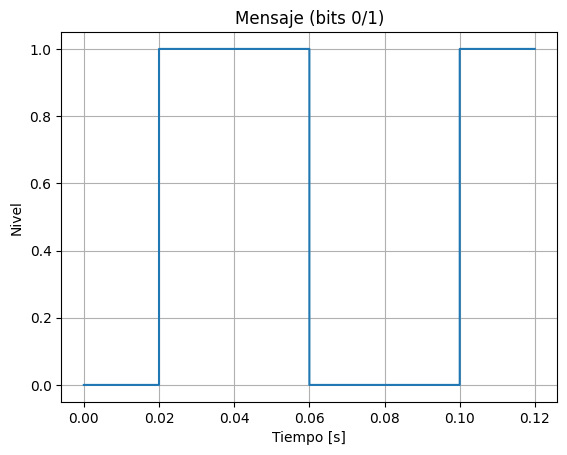

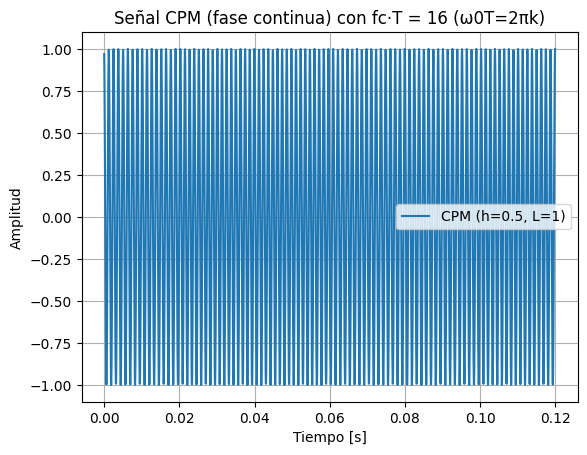

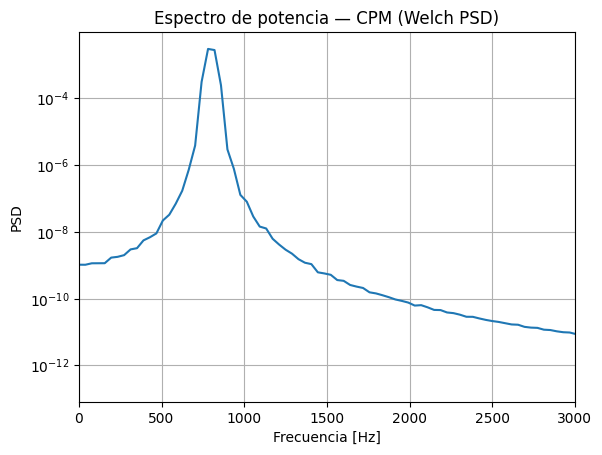

In [13]:
# -----------------------------------------------------
# CPM (CPFSK L=1) con ω0 T = 2π k  → fc*T entero (k=16)
# Gráficas: 1) bits  2) señal en el tiempo  3) PSD (Welch)
# -----------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

# -------- Parámetros --------
bits = np.array([0,1,1,0,0,1])
fs   = 20_000          # Hz muestreo
Tsym = 0.02            # s por símbolo
fc   = 800             # Hz (fc*Tsym = 16 ⇒ ω0T = 2π·16)
h    = 0.5             # índice de modulación (CPM binaria)
gamma = 1.0            # amplitud (constante, CPM es envolvente constante)

# Tiempo discreto
t_sym = np.arange(0, Tsym, 1/fs)
Nsym  = len(t_sym)
t     = np.concatenate([t_sym + k*Tsym for k in range(len(bits))])

# Mensaje NRZ: a_n = 2d_n - 1 ∈ {+1,-1}, extendido por símbolo
a = 2*bits - 1
a_up = np.repeat(a, Nsym)

# Pulso de frecuencia rectangular (L=1):
# Δf(t) = (h/(2T)) * a_up
df = (h/(2*Tsym)) * a_up

# Frecuencia instantánea y fase continua
f_inst = fc + df
phase  = 2*np.pi * np.cumsum(f_inst) / fs     # integración discreta

# Señal CPM (envolvente constante)
s_cpm = gamma * np.cos(phase)

# -------- PSD (Welch) --------
def welch_psd(x, fs, nperseg=4096, noverlap=2048):
    step = nperseg - noverlap
    w = np.hanning(nperseg); scale = np.sum(w**2)*fs
    P = []
    for i in range(0, len(x)-nperseg+1, step):
        seg = x[i:i+nperseg]*w
        X = np.fft.rfft(seg)
        P.append((np.abs(X)**2)/scale)
    if not P:
        nperseg = min(len(x), 512); noverlap = nperseg//2
        return welch_psd(x, fs, nperseg, noverlap)
    Pxx = np.mean(P, axis=0)
    f   = np.fft.rfftfreq(nperseg, 1/fs)
    return f, Pxx

f_psd, Pxx = welch_psd(s_cpm, fs, nperseg=4096, noverlap=2048)

# ========== 1) Bits ==========
plt.step(t, np.repeat(bits, Nsym), where='post')
plt.title('Mensaje (bits 0/1)')
plt.xlabel('Tiempo [s]'); plt.ylabel('Nivel')
plt.grid(True); plt.show()

# ========== 2) Señal CPM en el tiempo ==========
win = 6*Nsym   # ~6 símbolos
plt.plot(t[:win], s_cpm[:win], label='CPM (h=0.5, L=1)')
plt.title('Señal CPM (fase continua) con fc·T = 16 (ω0T=2πk)')
plt.xlabel('Tiempo [s]'); plt.ylabel('Amplitud')
plt.grid(True); plt.legend(); plt.show()

# ========== 3) Espectro de potencia (PSD) ==========
plt.semilogy(f_psd, Pxx)
plt.title('Espectro de potencia — CPM (Welch PSD)')
plt.xlabel('Frecuencia [Hz]'); plt.ylabel('PSD')
plt.grid(True, which='both'); plt.xlim(0, 3000)
plt.show()
